In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from IPython.display import display
import time 
import tracker
import seaborn as sns
from matplotlib import pyplot as plt
latest_date = tracker.processing_dates[-1]
os.chdir('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
latest_date

'2022.07.08.11.51'

In [3]:
# setting input and output with jupyter notebook in context 
if 'ipykernel_launcher.py' in sys.argv[0]:
    input_fn = 'results/samplesheets/hicpro/{}.hicpro.samplesheet.with_header.tsv'.format(latest_date) 
    #split_fastqs = 'results/samplesheets/fastq/{}.fastq.post-check.split_fastqs.with_header.tsv'.format(latest_date)
    hicpro_fn = 'results/samplesheets/fastq/{}.fastq.post-check.run_hicpro'.format(latest_date)
else:
    input_fn = sys.argv[1]
    #split_fastqs = sys.argv[2]
    hicpro_fn = sys.argv[3]

# Check HiCPro Statistics Logs for Mapping and Valid Pair Information

        ├── H9.GSE105028.Homo_Sapiens.Rad21.b1_allValidPairs.mergestat
        ├── H9.GSE105028.Homo_Sapiens.Rad21.b1.mpairstat
        ├── H9.GSE105028.Homo_Sapiens.Rad21.b1.mRSsta

In [4]:
def read_hicpro_stats_log(log):
    log_data = {}
    with open(log) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                log_data[info[0]] = int(info[1])
    return(log_data)

#### process the mpairstat files

In [5]:
mpairstat_data = []
tpl = 'results/hicpro/{std_sample_name}/hic_results/stats/{std_sample_name}/{std_sample_name}.mpairstat'
glob_str = tpl.format(std_sample_name='*')
for fn in glob.glob(glob_str):
    std_sample_name = fn.split('/')[2]
    mpairstat = read_hicpro_stats_log(fn)
    mpairstat['std_sample_name'] = std_sample_name
    mpairstat_data.append(mpairstat)
mpairstat_df = pd.DataFrame.from_dict(mpairstat_data)

In [6]:
mpairstat_df.head()

,Total_pairs_processed,Unmapped_pairs,Low_qual_pairs,Unique_paired_alignments,Multiple_pairs_alignments,Pairs_with_singleton,Low_qual_singleton,Unique_singleton_alignments,Multiple_singleton_alignments,Reported_pairs,std_sample_name
0,153966714,2604997,56151054,76103960,0,19106703,0,0,0,76103960,H9-HS.GSE105028.Homo_Sapiens.OCT4.b1
1,92095681,3103771,28904003,40314990,0,19772917,0,0,0,40314990,H9-HS.GSE105028.Homo_Sapiens.KLF4.b1
2,72193557,7699135,11629663,40581138,0,12283621,0,0,0,40581138,DEX.GSE117888.Homo_Sapiens.H3K27ac.b1
3,157470545,945233,51486610,94111166,0,10927536,0,0,0,94111166,SUCCS1-siEA.GSE180194.Homo_Sapiens.H3K27ac.b1
4,309943532,6152749,116701625,168453697,0,18635461,0,0,0,168453697,hESC-WT-D0.GSE120294.Homo_Sapiens.SMC1A.b1


#### process the mRSstat files

In [7]:
mRSstat_data = []
tpl = 'results/hicpro/{std_sample_name}/hic_results/stats/{std_sample_name}/{std_sample_name}.mRSstat'
glob_str = tpl.format(std_sample_name='*')
for fn in glob.glob(glob_str):
    std_sample_name = fn.split('/')[2]
    mRSstat = read_hicpro_stats_log(fn)
    mRSstat['std_sample_name'] = std_sample_name
    mRSstat_data.append(mRSstat)
mRSstat_df = pd.DataFrame.from_dict(mRSstat_data)

In [8]:
mRSstat_df.head()

,Valid_interaction_pairs,Valid_interaction_pairs_FF,Valid_interaction_pairs_RR,Valid_interaction_pairs_RF,Valid_interaction_pairs_FR,Dangling_end_pairs,Religation_pairs,Self_Cycle_pairs,Single-end_pairs,Filtered_pairs,Dumped_pairs,std_sample_name
0,46491751,10009913,10010326,8852601,17618911,12617301.0,15222568.0,181454.0,0,0,1590886,H9-HS.GSE105028.Homo_Sapiens.OCT4.b1
1,15351518,3489000,3493037,3263988,5105493,16357855.0,6151075.0,10943.0,0,0,2443599,H9-HS.GSE105028.Homo_Sapiens.KLF4.b1
2,5487478,433999,433866,444423,4175190,26762529.0,8301112.0,26132.0,0,0,3887,DEX.GSE117888.Homo_Sapiens.H3K27ac.b1
3,86654969,21347586,21361937,20901725,23043721,3225851.0,4011174.0,208339.0,0,0,10833,SUCCS1-siEA.GSE180194.Homo_Sapiens.H3K27ac.b1
4,140850440,34880917,34970055,35678651,35320817,16605285.0,8872000.0,2109630.0,0,0,16342,hESC-WT-D0.GSE120294.Homo_Sapiens.SMC1A.b1


#### process the mergestat files

In [9]:
mergestat_data = []
tpl = 'results/hicpro/{std_sample_name}/hic_results/stats/{std_sample_name}/{std_sample_name}_allValidPairs.mergestat'
glob_str = tpl.format(std_sample_name='*')
for fn in glob.glob(glob_str):
    std_sample_name = fn.split('/')[2]
    mergestat = read_hicpro_stats_log(fn)
    mergestat['std_sample_name'] = std_sample_name
    mergestat_data.append(mergestat)
mergestat_df = pd.DataFrame.from_dict(mergestat_data)

In [10]:
mergestat_df.head()

,valid_interaction,valid_interaction_rmdup,trans_interaction,cis_interaction,cis_shortRange,cis_longRange,std_sample_name
0,46491751,23995866,2124534,21871332,11784324,10087008,H9-HS.GSE105028.Homo_Sapiens.OCT4.b1
1,15351518,11522731,2757298,8765433,3230221,5535212,H9-HS.GSE105028.Homo_Sapiens.KLF4.b1
2,5487478,4625204,301794,4323410,3557851,765559,DEX.GSE117888.Homo_Sapiens.H3K27ac.b1
3,86654969,58012708,8843400,49169308,14482232,34687076,SUCCS1-siEA.GSE180194.Homo_Sapiens.H3K27ac.b1
4,140850440,106343947,31929964,74413983,16179002,58234981,hESC-WT-D0.GSE120294.Homo_Sapiens.SMC1A.b1


#### merge all the stat files together

HiC-Pro performs a couple of quality controls for most of the analysis steps. 

- The alignment statistics are the first quality controls. Aligned reads in the first (end-to-end) step, and alignment after trimming are reported. Note that in pratice, we ususally observed around **10-20% of trimmed reads**. An abnormal level of trimmed reads can reflect a ligation issue. Once the reads are aligned on the genome, HiC-pro checks the number of singleton, multiple hits or duplicates. The fraction of valid pairs are presented for each type of ligation products. Invalid pairs such as dangling and or self-circle are also represented. **A high level of dangling ends, or an imbalance in valid pairs ligation type can be due to a ligation, fill-in or digestion issue**. Finally HiC-Pro also calculated the distribution of fragment size on a subset of valid pairs. Additional statistics will report the fraction of intra/inter-chromosomal contacts, as well as the proportion of short range (<20kb) versus long range (>20kb) contacts.

Source: https://nservant.github.io/HiC-Pro/MANUAL.html

In [11]:
all_stats = mpairstat_df.merge(mRSstat_df, on='std_sample_name').merge(mergestat_df, on='std_sample_name')
# move the std_sample_name to the beginning
tmp = all_stats.pop('std_sample_name')
all_stats.insert(0, 'std_sample_name', tmp)

In [12]:
sample='A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b3'
all_stats.loc[all_stats['std_sample_name'] == sample]

,std_sample_name,Total_pairs_processed,Unmapped_pairs,Low_qual_pairs,Unique_paired_alignments,Multiple_pairs_alignments,Pairs_with_singleton,Low_qual_singleton,Unique_singleton_alignments,Multiple_singleton_alignments,Reported_pairs,Valid_interaction_pairs,Valid_interaction_pairs_FF,Valid_interaction_pairs_RR,Valid_interaction_pairs_RF,Valid_interaction_pairs_FR,Dangling_end_pairs,Religation_pairs,Self_Cycle_pairs,Single-end_pairs,Filtered_pairs,Dumped_pairs,valid_interaction,valid_interaction_rmdup,trans_interaction,cis_interaction,cis_shortRange,cis_longRange
14,A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b3,116189131,9396016,38838868,63599900,0,4354347,0,0,0,63599900,43260058,10713503,10724862,10847376,10974317,14142013.0,2628993.0,3568417.0,0,0,419,43260058,35626744,13292943,22333801,3850095,18483706


In [13]:
all_stats.sort_values(by='std_sample_name')

,std_sample_name,Total_pairs_processed,Unmapped_pairs,Low_qual_pairs,Unique_paired_alignments,Multiple_pairs_alignments,Pairs_with_singleton,Low_qual_singleton,Unique_singleton_alignments,Multiple_singleton_alignments,Reported_pairs,Valid_interaction_pairs,Valid_interaction_pairs_FF,Valid_interaction_pairs_RR,Valid_interaction_pairs_RF,Valid_interaction_pairs_FR,Dangling_end_pairs,Religation_pairs,Self_Cycle_pairs,Single-end_pairs,Filtered_pairs,Dumped_pairs,valid_interaction,valid_interaction_rmdup,trans_interaction,cis_interaction,cis_shortRange,cis_longRange
219,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,45904302,3362149,15542162,20017317,0,6982674,0,0,0,20017317,14233750,3520889,3526136,3672796,3513929,3282567.0,842541.0,1649704.0,0,0,8755,14233750,3014685,2482984,531701,78720,452981
127,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,92276625,6198972,30310709,41112515,0,14654429,0,0,0,41112515,23170231,5695153,5700729,6085342,5689007,12856595.0,1935554.0,3138798.0,0,0,11337,23170231,4869234,4105502,763732,150624,613108
172,293T.GSE128106.Homo_Sapiens.YY1.b1,247695887,59323085,52826289,85415584,0,50130929,0,0,0,85415584,24584547,6097328,6053022,5803763,6630434,56280841.0,3985774.0,356236.0,0,0,208186,24584547,1110646,224404,886242,170863,715379
208,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sap...,165894611,12380141,51858728,93044245,0,8611497,0,0,0,93044245,75756233,18873249,18869125,18902297,19111562,14534441.0,2262397.0,489726.0,0,0,1448,75756233,53512756,17600450,35912306,5529757,30382549
299,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sap...,78716891,10278126,23363051,41157536,0,3918178,0,0,0,41157536,31654215,7879448,7880656,7892101,8002010,8229449.0,1080532.0,192733.0,0,0,607,31654215,25675978,8126918,17549060,2770630,14778430
204,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sa...,169061715,13732671,48414040,97642042,0,9272962,0,0,0,97642042,71886126,17843234,17844011,17890491,18308390,21918126.0,3325487.0,510756.0,0,0,1547,71886126,51460797,15948179,35512618,5209144,30303474
303,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sa...,103397011,10877734,24392655,62334394,0,5792228,0,0,0,62334394,38727933,9562169,9561847,9611043,9992874,20361797.0,2792061.0,452069.0,0,0,534,38727933,30643463,9218577,21424886,3301441,18123445
103,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sa...,140903561,21766765,35730662,76480206,0,6925928,0,0,0,76480206,53019332,13164891,13166730,13191713,13495998,20655021.0,2497031.0,308172.0,0,0,650,53019332,43442814,14055397,29387417,3985206,25402211
36,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sa...,113738451,12078886,25410113,69499616,0,6749836,0,0,0,69499616,41040755,10118835,10138315,10159311,10624294,24851704.0,3183865.0,422744.0,0,0,548,41040755,32594833,10159780,22435053,3218164,19216889
108,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,278154964,3657012,103698606,160859544,0,9939802,0,0,0,160859544,100153514,24987768,24942594,24892294,25330858,55563289.0,4011119.0,1128265.0,0,0,3357,100153514,42076548,11245486,30831062,8009926,22821136


In [14]:
all_stats.describe()

,Total_pairs_processed,Unmapped_pairs,Low_qual_pairs,Unique_paired_alignments,Multiple_pairs_alignments,Pairs_with_singleton,Low_qual_singleton,Unique_singleton_alignments,Multiple_singleton_alignments,Reported_pairs,Valid_interaction_pairs,Valid_interaction_pairs_FF,Valid_interaction_pairs_RR,Valid_interaction_pairs_RF,Valid_interaction_pairs_FR,Dangling_end_pairs,Religation_pairs,Self_Cycle_pairs,Single-end_pairs,Filtered_pairs,Dumped_pairs,valid_interaction,valid_interaction_rmdup,trans_interaction,cis_interaction,cis_shortRange,cis_longRange
count,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,338.0,3.380000e+02,338.0,338.0,338.0,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.300000e+02,3.300000e+02,3.300000e+02,338.0,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02
mean,2.106655e+08,9.549605e+06,6.369238e+07,1.176417e+08,0.0,1.978181e+07,0.0,0.0,0.0,1.176417e+08,9.104756e+07,2.190887e+07,2.191554e+07,2.179916e+07,2.542398e+07,1.801797e+07,7.648887e+06,9.010982e+05,0.0,5.157491e+05,1.392504e+05,9.104756e+07,6.293453e+07,1.475608e+07,4.817846e+07,1.412028e+07,3.405817e+07
std,1.749367e+08,1.834467e+07,5.957972e+07,1.009196e+08,0.0,1.973365e+07,0.0,0.0,0.0,1.009196e+08,9.033456e+07,2.213416e+07,2.213851e+07,2.204735e+07,2.492278e+07,2.145927e+07,8.156995e+06,1.233339e+06,0.0,3.926657e+06,6.843104e+05,9.033456e+07,6.433680e+07,1.936747e+07,4.818796e+07,1.370543e+07,3.802635e+07
min,2.035761e+06,2.800000e+01,3.553990e+05,1.669272e+06,0.0,1.106200e+04,0.0,0.0,0.0,1.669272e+06,1.658719e+06,1.020370e+05,1.018940e+05,1.028980e+05,4.061020e+05,1.270000e+02,9.780000e+03,2.400000e+01,0.0,0.000000e+00,0.000000e+00,1.658719e+06,1.309550e+05,5.910000e+04,7.185500e+04,1.042500e+04,6.143000e+04
25%,8.944508e+07,2.113845e+06,2.580944e+07,4.676602e+07,0.0,6.591999e+06,0.0,0.0,0.0,4.676602e+07,2.837421e+07,6.633464e+06,6.643450e+06,6.579359e+06,7.775370e+06,6.714019e+06,2.363432e+06,1.924248e+05,0.0,0.000000e+00,1.459000e+03,2.837421e+07,2.225079e+07,3.921040e+06,1.703328e+07,4.810302e+06,1.112236e+07
50%,1.698625e+08,4.555628e+06,4.877174e+07,8.985061e+07,0.0,1.349536e+07,0.0,0.0,0.0,8.985061e+07,6.345256e+07,1.462685e+07,1.465336e+07,1.421865e+07,1.709831e+07,1.216932e+07,4.688960e+06,5.063905e+05,0.0,0.000000e+00,4.260000e+03,6.345256e+07,4.658286e+07,9.197528e+06,3.591600e+07,9.141251e+06,2.251324e+07
75%,2.675115e+08,9.219563e+06,8.178548e+07,1.553134e+08,0.0,2.611178e+07,0.0,0.0,0.0,1.553134e+08,1.151778e+08,2.747923e+07,2.748368e+07,2.749049e+07,3.326388e+07,2.089233e+07,1.042776e+07,1.032642e+06,0.0,0.000000e+00,1.153675e+04,1.151778e+08,8.030002e+07,1.793081e+07,6.184003e+07,1.831442e+07,4.388613e+07
max,9.457126e+08,1.531101e+08,3.548096e+08,5.117688e+08,0.0,1.823395e+08,0.0,0.0,0.0,5.117688e+08,4.501581e+08,1.115301e+08,1.115579e+08,1.119331e+08,1.408655e+08,2.419002e+08,6.929394e+07,9.292592e+06,0.0,5.603980e+07,8.124434e+06,4.501581e+08,3.647851e+08,1.587372e+08,2.726536e+08,7.917164e+07,2.352802e+08


/mnt/BioAdHoc/Groups/vd-ay/kfetter/packages/mambaforge/envs/hichip-db/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_pairs_processed', ylabel='Density'>

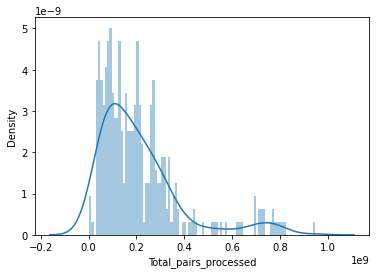

In [15]:
sns.distplot(all_stats.Total_pairs_processed, bins=100)

In [16]:
all_stats.sort_values("Valid_interaction_pairs")

,std_sample_name,Total_pairs_processed,Unmapped_pairs,Low_qual_pairs,Unique_paired_alignments,Multiple_pairs_alignments,Pairs_with_singleton,Low_qual_singleton,Unique_singleton_alignments,Multiple_singleton_alignments,Reported_pairs,Valid_interaction_pairs,Valid_interaction_pairs_FF,Valid_interaction_pairs_RR,Valid_interaction_pairs_RF,Valid_interaction_pairs_FR,Dangling_end_pairs,Religation_pairs,Self_Cycle_pairs,Single-end_pairs,Filtered_pairs,Dumped_pairs,valid_interaction,valid_interaction_rmdup,trans_interaction,cis_interaction,cis_shortRange,cis_longRange
66,VCAP-DHT-24hr.GSE157107.Homo_Sapiens.H3K27ac.b1,2035761,28,355399,1669272,0,11062,0,0,0,1669272,1658719,412171,413542,426904,406102,742.0,9780.0,27.0,0,0,4,1658719,1658716,725924,932792,266131,666661
226,CTL.GSE117888.Homo_Sapiens.H3K27ac.b2,66532460,7733760,11926623,36619465,0,10252612,0,0,0,36619465,2488778,102037,101894,102898,2181949,27548830.0,6576164.0,2207.0,0,0,3486,2488778,2261585,84284,2177301,1973698,203603
157,VCAP-DHT-2hr.GSE157107.Homo_Sapiens.H3K27ac.b1,3699171,29,572875,3108805,0,17462,0,0,0,3108805,3088610,771283,777384,774270,765673,127.0,20042.0,24.0,0,0,2,3088610,3088604,942386,2146218,596278,1549940
244,SW480.GSE136629.Homo_Sapiens.H3K27ac.b1,71283637,4841504,15838399,44280226,0,6323508,0,0,0,44280226,3426384,363550,362568,423007,2277259,30464042.0,10177622.0,204966.0,0,0,7212,3426384,1537978,249352,1288626,1048582,240044
99,VCAP-Veh.GSE157107.Homo_Sapiens.H3K27ac.b1,4347936,49,770465,3554428,0,22994,0,0,0,3554428,3531524,875103,876497,920518,859406,868.0,21880.0,148.0,0,0,8,3531524,3531506,1507406,2024100,589162,1434938
115,SW620.GSE136629.Homo_Sapiens.H3K27ac.b1,76672141,5789025,15943632,47507255,0,7432229,0,0,0,47507255,4024566,444524,444556,559288,2576198,32182190.0,10884356.0,399708.0,0,0,16435,4024566,2656952,290301,2366651,1936188,430463
259,HEC-1-B-eRNA-LNA.GSE148958.Homo_Sapiens.V5.b1,86232058,32399257,15898318,7149767,0,30784716,0,0,0,7149767,4601208,1148106,1147959,1127681,1177462,765104.0,433725.0,39589.0,0,0,1310141,4601208,994780,418801,575979,169600,406379
332,CTL.GSE117888.Homo_Sapiens.H3K27ac.b1,48007428,3208141,6785400,25289705,0,12724182,0,0,0,25289705,4852812,455320,457376,465835,3474281,14543379.0,5891288.0,2137.0,0,0,89,4852812,1369641,203105,1166536,917558,248978
230,IMR90-Senescent.GSE100856.Homo_Sapiens.CTCF.b1,119605102,6683686,26848850,60783553,0,25289013,0,0,0,60783553,4948961,1187207,1176905,1186931,1397918,51849125.0,3851298.0,47301.0,0,0,86868,4948961,130955,59100,71855,10425,61430
283,Naive_Tcells.GSE101498.Homo_Sapiens.H3K27ac.b1,12051488,146067,3438442,7599481,0,867498,0,0,0,7599481,5384572,1286715,1296977,1373389,1427491,1504176.0,610370.0,100223.0,0,0,140,5384572,2219298,662842,1556456,540318,1016138


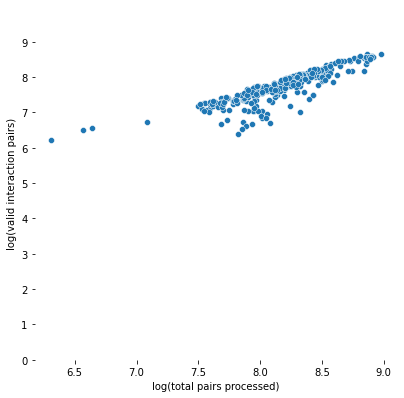

In [17]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=np.log10(all_stats["Total_pairs_processed"]),
                y=np.log10(all_stats["Valid_interaction_pairs"]),
                ax=ax)
ax.set_xlabel('log(total pairs processed)')
ax.set_ylabel('log(valid interaction pairs)')
ax.set_ylim(0, 10)
ax.set_yticks(range(0, 10))

Text(0, 0.5, 'valid interaction pairs')

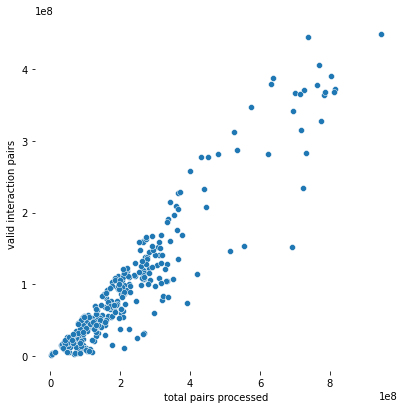

In [18]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=all_stats["Total_pairs_processed"],
                y=all_stats["Valid_interaction_pairs"],
                ax=ax)
ax.set_xlabel('total pairs processed')
ax.set_ylabel('valid interaction pairs')
# ax.set_ylim(0, 10)
# ax.set_yticks(range(0, 10))